In [138]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import requests
import json

# Part 1: Extract books data from Json and HTML files.

## Reading and converting a Json file to Pandas Dataframe.

In [224]:
with open("Books.json") as f:
    data = json.load(f)
    
df = pd.DataFrame(data).T
df

,Name,Authors,Description,DOI,Citations,Publisher
1,Deep Learning-Based Face Analytics,"Nalini K Ratha, Vishal M. Patel, Rama Chellappa",This book provides an overview of different de...,https://doi.org/10.1007/978-3-030-74697-1,12,Springer Cham
2,"Computer Vision Detection, Recognition and Rec...","Roberto Cipolla, Sebastiano Battiato, Giovanni...",Computer vision is the science and technology ...,https://doi.org/10.1007/978-3-642-12848-6,103,"Springer Berlin, Heidelberg"
3,Computer Vision Using Deep Learning,Vaibhav Verdhan,This book will bring into focus these and othe...,https://doi.org/10.1007/978-1-4842-6616-8,7,"Apress Berkeley, CA"


## Reading and converting a HTML file to Pandas Dataframe.

In [225]:
HTMLFile = open("Books.html", "r")
books = HTMLFile.read()

soup = BeautifulSoup(books)
table = soup.findAll("table")
df = pd.read_html(books.replace(",", "."))[0]
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df

,Book,Authors,Description,DOI,Citations,Publisher
1,Deep Learning-Based Face Analytics,Nalini K Ratha. Vishal M. Patel. Rama Chellappa,This book provides an overview of different de...,https://doi.org/10.1007/978-3-030-74697-1,12,Springer Cham
2,Computer Vision Detection. Recognition and Rec...,Roberto Cipolla. Sebastiano Battiato. Giovanni...,Computer vision is the science and technology ...,https://doi.org/10.1007/978-3-642-12848-6,103,Springer Berlin. Heidelberg
3,Computer Vision Using Deep Learning,Vaibhav Verdhan,This book will bring into focus these and othe...,https://doi.org/10.1007/978-1-4842-6616-8,7,Apress Berkeley. CA


# Part 2: Scraping Katz staff webpage.

In [226]:
res = requests.get("https://www.yu.edu/katz/staff", 'html.parser')
data = res.content
soup = BeautifulSoup(data)
staff = soup.find('div', class_='text-only')

In [227]:
offices = [o.text for o in staff.findAll('h3')]
offices[0] = offices[0][:-1]
offices[-1] = offices[-1][:-1]
offices

['Office of the Dean',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Programs',
 'Teaching and Learning']

In [228]:
a = [i.contents for i in staff.findAll("p")]
names = [r[0].split(",")[0] for r in a]
names.insert(2, a[1][8][1:15])
print(len(names))
names

16


['Paul Russo',
 'Aaron Ross',
 'Sofia Binioris',
 'Jackie Hamilton',
 'Tabitha Collazo',
 'Jared Hakimi',
 'Shayna Matzner',
 'Xavier Velasquez',
 'Rafael Reyes',
 'Shari Lowsky',
 'Simon Jaffe',
 'Gladys Davis',
 'Nebahat Bayrakcioglu',
 'John Vivolo',
 'Lloyd Carew-Reid',
 'Denton Field']

In [229]:
emails = [i.contents[0] for i in staff.findAll("a")][1:]
emails.remove('Schedule an Appointment')
emails.remove('Schedule an Appointment')
emails.remove('Schedule an Appointment')
emails.insert(0, "NaN")
# del emails[5:10:2]
print(len(emails))
emails 

16


['NaN',
 'aaron.ross2@yu.edu',
 'sofia.binioris@yu.edu',
 'jackie.hamilton@yu.edu',
 'tabitha.collazo@yu.edu',
 'jared.hakimi@yu.edu',
 'shayna.matzner@yu.edu',
 'xavier.velasquez@yu.edu',
 'rafael.reyes@yu.edu',
 'shari.lowsky@yu.edu',
 'simon.jaffe@yu.edu',
 'gladys.davis@yu.edu',
 'nebahat.bayrakcioglu@yu.edu',
 'john.vivolo@yu.edu',
 'lloyd.carew-reid@yu.edu',
 'denton.field@yu.edu']

In [230]:
# Finding all the paragraph tags and getting contents and splitting them based on "," and getting 
a = [i.contents for i in staff.findAll("p")]
titles = [r[0].split(",")[1] for r in a]
titles[0] = titles[0][:-1]
titles[1] = titles[1][:-1]
titles[-2] = titles[-2][1:]
titles = [i.strip() for i in titles]
titles.insert(2, a[1][8][16:-1].strip())
print(len(titles))
titles

16


['Vice Provost and Dean',
 'Director of Strategic Initiatives and Deputy to the Dean',
 'Senior Project Manager and Advisor to the Dean',
 'Director of Global Engagement and New Business Development',
 'Business and Operations Coordinator',
 'Director',
 'Assistant Director',
 'Assistant Director',
 'Director of Graduate Student Life and Community Engagement',
 'Academic Program Manager',
 'Academic Program Coordinator',
 'Academic Program Coordinator',
 'Academic Program Coordinator',
 'Director of Online and Campus Learning Strategies',
 'Instructional Designer',
 'Educational Technologist']

In [231]:
# Finding all the paragraph tags and extracting it's content and slicing them to get the ph numbers.
ph_numbers = [s.contents[4][3:15] for s in staff.find_all("p")[1:14]]
ph_numbers.insert(0, "NaN")
ph_numbers.insert(2,"NaN")
ph_numbers.append("NaN")
print(len(ph_numbers))
ph_numbers

16


['NaN',
 '646-592-4148',
 'NaN',
 '646-787-6194',
 '646-592-4735',
 '646-592-4722',
 '646-592-4726',
 '646-592-4737',
 '646-592-4729',
 '646-592-4311',
 '646-592-4717',
 '646-592-4762',
 '646-592-4034',
 '646-592-4743',
 '646-592-4768',
 'NaN']

In [232]:
# Creating Dataframe to store the staff dataframe.
staff_info = pd.DataFrame({"Names":names, "Titles":titles, "Office":"NaN","Email":emails, "Phone":ph_numbers })

# Adding persons to their particular offices.
staff_info.Office[:4] = offices[0] 
staff_info.Office[4:7] = offices[1]
staff_info.Office[7] = offices[2]
staff_info.Office[8:12] = offices[3]
staff_info.Office[12:] = offices[4]
staff_info

,Names,Titles,Office,Email,Phone
0,Paul Russo,Vice Provost and Dean,Office of the Dean,NaN,NaN
1,Aaron Ross,Director of Strategic Initiatives and Deputy t...,Office of the Dean,aaron.ross2@yu.edu,646-592-4148
2,Sofia Binioris,Senior Project Manager and Advisor to the Dean,Office of the Dean,sofia.binioris@yu.edu,NaN
3,Jackie Hamilton,Director of Global Engagement and New Business...,Office of the Dean,jackie.hamilton@yu.edu,646-787-6194
4,Tabitha Collazo,Business and Operations Coordinator,Graduate Admissions,tabitha.collazo@yu.edu,646-592-4735
5,Jared Hakimi,Director,Graduate Admissions,jared.hakimi@yu.edu,646-592-4722
6,Shayna Matzner,Assistant Director,Graduate Admissions,shayna.matzner@yu.edu,646-592-4726
7,Xavier Velasquez,Assistant Director,Graduate Student Life,xavier.velasquez@yu.edu,646-592-4737
8,Rafael Reyes,Director of Graduate Student Life and Communit...,Academic Programs,rafael.reyes@yu.edu,646-592-4729
9,Shari Lowsky,Academic Program Manager,Academic Programs,shari.lowsky@yu.edu,646-592-4311


# Part 3: Scraping hardcover Fiction books data New York Times Developer Network.

In [233]:
key = "LTG9OmvmtywjxE8AlEGCotpP9wXyW7QG"
import json

#Get data from API
data = requests.get("https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key="+key)

#Change to json format
data = data.json()

data

{'status': 'OK',
 'copyright': 'Copyright (c) 2022 The New York Times Company.  All Rights Reserved.',
 'num_results': 15,
 'last_modified': '2022-10-26T22:10:35-04:00',
 'results': {'list_name': 'Hardcover Fiction',
  'list_name_encoded': 'hardcover-fiction',
  'bestsellers_date': '2022-10-22',
  'published_date': '2022-11-06',
  'published_date_description': 'latest',
  'next_published_date': '',
  'previous_published_date': '2022-10-30',
  'display_name': 'Hardcover Fiction',
  'normal_list_ends_at': 15,
  'updated': 'WEEKLY',
  'books': [{'rank': 1,
    'rank_last_week': 0,
    'weeks_on_list': 1,
    'asterisk': 0,
    'dagger': 0,
    'primary_isbn10': '0385548923',
    'primary_isbn13': '9780385548922',
    'publisher': 'Doubleday',
    'description': 'Two childhood friends follow in their fathers’ footsteps, which puts them on opposite sides of the law.',
    'price': '0.00',
    'title': 'THE BOYS FROM BILOXI',
    'author': 'John Grisham',
    'contributor': 'by John Grisham'

In [234]:
#Create data frame of books from results
df = pd.DataFrame(data['results']['books'])
df.head()

,rank,rank_last_week,weeks_on_list,asterisk,dagger,primary_isbn10,primary_isbn13,publisher,description,price,...,book_image_height,amazon_product_url,age_group,book_review_link,first_chapter_link,sunday_review_link,article_chapter_link,isbns,buy_links,book_uri
0,1,0,1,0,0,0385548923,9780385548922,Doubleday,Two childhood friends follow in their fathers’...,0.00,...,500,https://www.amazon.com/dp/0385548923?tag=NYTBS...,,,,,,"[{'isbn10': '0385548923', 'isbn13': '978038554...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/b59f42c0-d9d0-5535-bf4b-21e5d04d3a46
1,2,0,1,0,0,0063251922,9780063251922,Harper,A reimagining of Charles Dickens’s “David Copp...,0.00,...,500,https://www.amazon.com/dp/0063251922?tag=NYTBS...,,,,,,"[{'isbn10': '0063251922', 'isbn13': '978006325...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/dd6e4f9d-d082-552d-b888-7276a25b5aca
2,3,2,7,0,0,1668002175,9781668002179,Scribner,A high school kid inherits a shed that is a po...,0.00,...,500,https://www.amazon.com/dp/1668002175?tag=NYTBS...,,,,,,"[{'isbn10': '', 'isbn13': ''}, {'isbn10': '166...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/1c203c2d-147d-5639-8e0c-009ba6f15698
3,4,1,2,0,0,1538719827,9781538719824,Grand Central,The seventh book in the Memory Man series. Dec...,0.00,...,500,https://www.amazon.com/dp/1538719827?tag=NYTBS...,,,,,,"[{'isbn10': '1538719827', 'isbn13': '978153871...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/b14c0c7a-c260-5808-b5db-b72e7a45772f
4,5,4,5,0,0,059344955X,9780593449554,Random House,Musicians from different backgrounds are attra...,0.00,...,500,https://www.amazon.com/dp/059344955X?tag=NYTBS...,,,,,,"[{'isbn10': '059344955X', 'isbn13': '978059344...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/61e3a1f0-08db-5240-9ee0-72308b3b9b9d


We explore some of the atrributes that seem interesting.

We explore the author attribute to see if there are any authors that dominate the list or have more than one book on the list.

In [235]:
#Summary statistics of author
df['author'].describe()

count               15
unique              15
top       John Grisham
freq                 1
Name: author, dtype: object

We observe that each author appears at most once and so no further analysis is interesting.

We explore the weeks on list attribute to see how long the books usually stay on the list

In [236]:
#Summary statistics of weeks on list
df['weeks_on_list'].describe()

count    15.000000
mean      4.200000
std       6.014269
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max      25.000000
Name: weeks_on_list, dtype: float64

We further explore these statistics with a box plot and histogram 

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


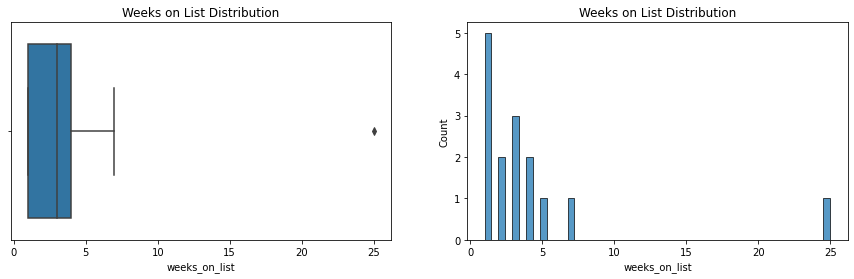

In [237]:
#Initiate figure
plt.figure(figsize=(15,4))

#Initiate Left hand plot
plt.subplot(121)

#define box plot
sns.boxplot(df['weeks_on_list']);

# Title
plt.title('Weeks on List Distribution')


# --------------------------------------------------------------------------

# Initiate right hand plot
plt.subplot(122)

#Define histogram 
sns.histplot(df['weeks_on_list'], bins = 50)

# Title
plt.title('Weeks on List Distribution')

#show
plt.show();


We observe that on average a book is on the list for 4.2 weeks with median of 3. There is one significant outlier that has been on the list for 25 weeks. 

We explore the publisher category to see if there are any publishers who dominate the list or appear more than once. 

In [238]:
#Summary Statistics of publisher
df['publisher'].describe()

count            15
unique           10
top       Doubleday
freq              2
Name: publisher, dtype: object

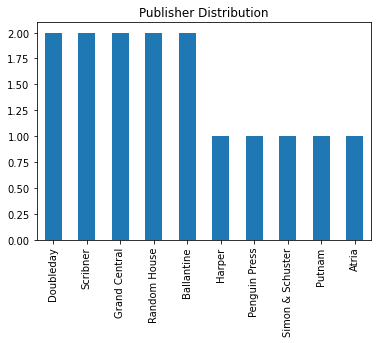

In [239]:
#Bar plot of publisher
df['publisher'].value_counts().plot.bar(title = "Publisher Distribution");

We observe that there are 5 recurring publishers each having two books on the list and five publshers with one book on the list